### Load Data

In [3]:
import pandas as pd

pd.set_option('display.max_columns', 100)

df_train = pd.read_parquet('../../data/model_data/training_data.parquet').sort_values(by=['Date', 'Ticker'], ignore_index=True)

df_train

,Date,Ticker,Adj Close in 60 Days,Adj Close,Volume,10 Day Avg Gain,10 Day Avg Loss,30 Day Avg Gain,30 Day Avg Loss,60 Day Avg Gain,60 Day Avg Loss,60 Day Price Std,60 Day Price Mean,60 Day Price 10th Percentile,60 Day Price 90th Percentile,Adj Close Mean 0 to 10 Day Lag,Adj Close Mean 10 to 20 Day Lag,Adj Close Mean 20 to 30 Day Lag,Adj Close Mean 30 to 40 Day Lag,Adj Close Mean 40 to 50 Day Lag,Adj Close Mean 0 to 10 Day Lag Difference,Adj Close Mean 10 to 20 Day Lag Difference,Adj Close Mean 20 to 30 Day Lag Difference,Adj Close Mean 30 to 40 Day Lag Difference,Volume Mean 0 to 10 Day Lag,Volume Mean 10 to 20 Day Lag,Volume Mean 20 to 30 Day Lag,Volume Mean 30 to 40 Day Lag,Volume Mean 40 to 50 Day Lag,Congressional Purchases Past 90 Calendar Days,Congressional Sales Past 90 Calendar Days
0,2015-12-24 00:00:00+00:00,AAPL,24.194263,24.494490,54281600.0,0.080037,0.264602,0.128333,0.189401,0.152332,0.156425,0.970395,25.979742,24.720767,27.224792,24.798318,26.579572,26.436727,27.177436,25.869796,-1.781253,0.142845,-0.740709,1.307640,195440160.0,144712000.0,145997280.0,173605320.0,208087560.0,0,1
1,2015-12-24 00:00:00+00:00,CAT,59.485294,55.321060,2322100.0,0.580481,0.341272,0.365990,0.433235,0.411500,0.335728,2.065715,55.659195,52.515944,57.955542,53.339613,55.278802,56.091318,58.437958,56.003994,-1.939189,-0.812516,-2.346640,2.433964,7296050.0,6032330.0,5290740.0,5432720.0,7550870.0,0,1
2,2015-12-24 00:00:00+00:00,CVX,65.311241,63.431988,4998700.0,0.797292,0.607789,0.568740,0.546405,0.603434,0.435118,2.167446,61.728233,59.691293,64.050002,62.549253,61.578304,62.236110,63.787218,61.303701,0.970949,-0.657806,-1.551108,2.483516,13462920.0,11568740.0,7670770.0,10350960.0,8460490.0,0,1
3,2015-12-24 00:00:00+00:00,GS,129.326538,152.492950,1107600.0,1.443274,1.413191,0.928955,1.325819,1.014722,0.916516,4.884594,155.194709,149.171555,160.820096,150.637677,156.244505,159.165193,160.955830,154.478665,-5.606828,-2.920688,-1.790637,6.477165,3325280.0,2986550.0,2618510.0,2585760.0,3099650.0,1,1
4,2015-12-24 00:00:00+00:00,HD,106.316124,107.910774,1517100.0,0.487182,0.457951,0.705197,0.468655,0.538126,0.316380,4.386560,102.682560,97.203424,108.652122,106.975397,108.263686,103.085273,100.959200,99.922850,-1.288289,5.178413,2.126073,1.036349,4665940.0,5317790.0,6897670.0,4067060.0,4360900.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29140,2024-07-03 00:00:00+00:00,MRK,113.690002,125.013603,4002100.0,0.900972,1.113550,0.571968,0.716370,0.514907,0.514201,2.291954,127.255922,124.141795,129.840558,128.426771,128.371864,126.554128,128.660353,127.112034,0.054907,1.817735,-2.106225,1.548319,14149900.0,6875150.0,8756370.0,6744190.0,7520570.0,0,1
29141,2024-07-03 00:00:00+00:00,MSFT,428.019989,459.940979,9932800.0,2.303839,0.863437,2.247944,1.069069,2.276352,1.661719,18.010069,423.058963,400.674808,449.087555,451.470270,434.501843,422.797949,415.489096,401.206888,16.968427,11.703894,7.308853,14.282208,18827580.0,16383640.0,20807330.0,16184590.0,22515970.0,3,7
29142,2024-07-03 00:00:00+00:00,UNH,581.849976,488.159027,2239200.0,3.952988,3.072107,2.638025,3.473563,3.259538,2.664708,18.427638,489.701731,474.279044,512.867938,488.678171,491.051801,499.923950,509.058670,486.139514,-2.373630,-8.872150,-9.134720,22.919156,5933730.0,3452100.0,3867740.0,2913310.0,3079510.0,0,1
29143,2024-07-03 00:00:00+00:00,WBA,9.060000,10.841380,26845500.0,0.009767,0.499094,0.093112,0.311893,0.100178,0.227093,1.659137,15.978217,14.771623,17.460229,13.444287,15.364481,15.533450,17.143166,17.035427,-1.920194,-0.168969,-1.609716,0.107739,34387240.0,9924720.0,16974690.0,8874300.0,8472370.0,0,1


In [10]:
df_test = pd.read_parquet('../../data/model_data/testing_data.parquet').sort_values(by=['Date', 'Ticker'], ignore_index=True)

df_test

,Date,Ticker,Adj Close in 60 Days,Adj Close,Volume,10 Day Avg Gain,10 Day Avg Loss,30 Day Avg Gain,30 Day Avg Loss,60 Day Avg Gain,60 Day Avg Loss,60 Day Price Std,60 Day Price Mean,60 Day Price 10th Percentile,60 Day Price 90th Percentile,Adj Close Mean 0 to 10 Day Lag,Adj Close Mean 10 to 20 Day Lag,Adj Close Mean 20 to 30 Day Lag,Adj Close Mean 30 to 40 Day Lag,Adj Close Mean 40 to 50 Day Lag,Adj Close Mean 0 to 10 Day Lag Difference,Adj Close Mean 10 to 20 Day Lag Difference,Adj Close Mean 20 to 30 Day Lag Difference,Adj Close Mean 30 to 40 Day Lag Difference,Volume Mean 0 to 10 Day Lag,Volume Mean 10 to 20 Day Lag,Volume Mean 20 to 30 Day Lag,Volume Mean 30 to 40 Day Lag,Volume Mean 40 to 50 Day Lag,Congressional Purchases Past 90 Calendar Days,Congressional Sales Past 90 Calendar Days
0,2015-12-24 00:00:00+00:00,AMGN,115.816658,126.452103,943000.0,1.096357,0.796363,1.006924,0.814146,1.009135,0.699529,4.877767,120.935859,113.872980,125.740771,124.367628,123.584390,122.481847,123.234310,119.349458,0.783237,1.102544,-0.752464,3.884852,3509140.0,2935060.0,3244410.0,3121370.0,3939210.0,0,1
1,2015-12-24 00:00:00+00:00,BA,120.255928,128.722504,1185000.0,0.860066,1.118356,0.722253,0.765898,0.755481,0.550366,4.418714,128.754730,122.425815,132.987834,128.988866,131.408534,131.562788,131.684204,127.417228,-2.419669,-0.154253,-0.121416,4.266976,4102880.0,3429540.0,2874360.0,2669230.0,4932430.0,0,0
2,2015-12-24 00:00:00+00:00,CRM,71.462753,77.486023,1084700.0,0.301661,0.455975,0.410512,0.439715,0.442038,0.360400,1.959126,77.697573,74.935341,80.333372,77.316764,80.091447,78.447742,78.189886,77.475058,-2.774683,1.643704,0.257856,0.714828,3380550.0,3321140.0,4858610.0,2680950.0,3133940.0,0,0
3,2015-12-24 00:00:00+00:00,MMM,101.896019,93.109833,1014686.0,0.547489,0.937321,0.418124,0.558164,0.471638,0.355560,3.042756,94.410902,90.543301,97.323853,92.691669,96.557341,96.801584,96.959827,93.484661,-3.865672,-0.244243,-0.158244,3.475166,4314270.8,2702302.2,2377576.3,2735491.2,3282111.0,0,4
4,2015-12-24 00:00:00+00:00,PG,65.515038,62.572762,2498000.0,0.392109,0.235263,0.312118,0.211999,0.276281,0.165433,1.708618,59.624889,57.670639,61.964988,62.221431,60.184812,59.228064,59.851521,59.040537,2.036619,0.956747,-0.623456,0.810983,11361240.0,8779930.0,7697420.0,7611840.0,10391110.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17147,2024-07-03 00:00:00+00:00,MMM,137.300003,101.075127,1230800.0,0.492346,0.407801,0.398187,0.493153,0.534609,0.363463,4.311441,97.311003,90.673070,101.844837,101.428220,99.968090,99.001164,99.215373,93.435883,1.460130,0.966926,-0.214209,5.779490,3857360.0,3596170.0,5981670.0,4513980.0,6318350.0,0,1
17148,2024-07-03 00:00:00+00:00,PG,173.550003,162.850555,2980500.0,0.254468,0.724640,0.502974,0.618281,0.546859,0.401216,4.032108,162.986984,155.269542,166.811732,165.074182,166.086095,164.065250,165.471790,161.920151,-1.011913,2.020845,-1.406540,3.551639,7454720.0,5010550.0,5626180.0,5269990.0,6465080.0,1,2
17149,2024-07-03 00:00:00+00:00,TRV,236.110001,202.802933,523100.0,0.665091,1.144991,0.749383,1.109372,0.799882,1.227396,4.858594,211.269899,204.942570,217.742920,205.892415,207.809865,210.726520,215.512764,211.772733,-1.917450,-2.916655,-4.786244,3.740031,1482260.0,1208760.0,1186330.0,952710.0,1215390.0,0,0
17150,2024-07-03 00:00:00+00:00,V,275.170013,268.451660,5017800.0,1.084824,1.546899,0.893207,1.210904,0.873464,1.010804,4.046228,272.651303,267.565256,277.995547,269.957657,273.140280,272.119324,278.085852,270.490982,-3.182623,1.020956,-5.966528,7.594870,12733170.0,6560590.0,5575850.0,10566510.0,5965770.0,1,2


In [8]:
df_val = pd.read_parquet('../../data/model_data/validation_data.parquet').sort_values(by=['Date', 'Ticker'], ignore_index=True)

df_val

,Date,Ticker,Adj Close in 60 Days,Adj Close,Volume,10 Day Avg Gain,10 Day Avg Loss,30 Day Avg Gain,30 Day Avg Loss,60 Day Avg Gain,60 Day Avg Loss,60 Day Price Std,60 Day Price Mean,60 Day Price 10th Percentile,60 Day Price 90th Percentile,Adj Close Mean 0 to 10 Day Lag,Adj Close Mean 10 to 20 Day Lag,Adj Close Mean 20 to 30 Day Lag,Adj Close Mean 30 to 40 Day Lag,Adj Close Mean 40 to 50 Day Lag,Adj Close Mean 0 to 10 Day Lag Difference,Adj Close Mean 10 to 20 Day Lag Difference,Adj Close Mean 20 to 30 Day Lag Difference,Adj Close Mean 30 to 40 Day Lag Difference,Volume Mean 0 to 10 Day Lag,Volume Mean 10 to 20 Day Lag,Volume Mean 20 to 30 Day Lag,Volume Mean 30 to 40 Day Lag,Volume Mean 40 to 50 Day Lag,Congressional Purchases Past 90 Calendar Days,Congressional Sales Past 90 Calendar Days
0,2015-12-24 00:00:00+00:00,AXP,53.312790,61.423836,1956400.0,0.365078,0.360697,0.232587,0.312839,0.245531,0.295891,2.345914,63.849332,61.135779,67.412856,60.703300,62.062912,62.931396,64.562424,66.024479,-1.359612,-0.868484,-1.631028,-1.462054,6577980.0,5235460.0,4932520.0,6215000.0,7275040.0,0,1
1,2015-12-24 00:00:00+00:00,CSCO,21.135672,20.633146,8166300.0,0.166542,0.120574,0.114544,0.125597,0.112661,0.091937,0.663431,20.801952,20.064189,21.748457,20.199084,20.508805,20.470374,21.454555,21.639188,-0.309721,0.038431,-0.984182,-0.184632,24778710.0,23627670.0,36908410.0,26037480.0,22088420.0,0,0
2,2015-12-24 00:00:00+00:00,DIS,90.638680,99.091301,4356100.0,0.580356,1.039025,0.510305,0.819761,0.566270,0.506301,4.315714,104.091629,98.092763,109.261369,101.826469,105.414491,109.385078,107.113773,103.566383,-3.588022,-3.970586,2.271304,3.547391,13367630.0,9767410.0,7206910.0,10503590.0,7509160.0,0,0
3,2015-12-24 00:00:00+00:00,HON,89.748055,83.227882,832731.0,0.754738,0.524899,0.475564,0.422897,0.463923,0.324914,2.097698,80.788164,77.708540,82.883507,81.141813,82.130360,82.126520,81.710297,79.408560,-0.988548,0.003841,0.416223,2.301736,4516328.5,2761647.1,3331478.4,2719260.4,5065076.9,0,0
4,2015-12-24 00:00:00+00:00,IBM,94.954712,89.372406,1563979.0,0.540437,0.445409,0.435495,0.365894,0.418437,0.461595,3.139906,90.550352,87.276630,96.078659,88.528802,89.805550,87.817047,89.249786,92.376886,-1.276748,1.988503,-1.432738,-3.127100,5200565.6,4224271.1,4412456.8,4705525.0,7938480.9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17147,2024-07-03 00:00:00+00:00,HON,207.630005,211.303818,1086700.0,0.621600,0.662376,0.845707,0.585796,0.859209,0.598278,7.978585,201.162974,191.553133,212.279465,212.592758,208.578725,200.346765,200.930688,192.291165,4.014034,8.231960,-0.583923,8.639523,3191020.0,2572380.0,2527860.0,2425270.0,3180500.0,1,0
17148,2024-07-03 00:00:00+00:00,IBM,220.839996,174.206345,1649000.0,1.226273,0.712766,0.800664,0.608677,0.646026,0.847996,5.953506,170.180709,164.179771,178.995076,172.272269,167.799390,167.435568,166.491324,166.810649,4.472879,0.363821,0.944244,-0.319325,4160870.0,3158030.0,3664780.0,3185900.0,6598910.0,0,1
17149,2024-07-03 00:00:00+00:00,KO,71.790001,62.898792,9154200.0,0.216516,0.146992,0.175193,0.134083,0.195842,0.121082,1.688137,61.385548,58.183553,63.035769,62.981226,62.507845,61.625074,62.122773,60.898728,0.473381,0.882772,-0.497699,1.224045,12866900.0,10049930.0,10997740.0,10137340.0,14469920.0,0,0
17150,2024-07-03 00:00:00+00:00,MCD,303.690002,248.553665,2026100.0,1.251721,1.330263,0.965298,1.500254,0.917774,1.180148,7.925374,261.112749,250.336351,270.584464,253.481990,253.631113,255.584926,267.550943,270.286166,-0.149123,-1.953813,-11.966017,-2.735223,4482100.0,2999610.0,4030070.0,3195520.0,3825750.0,0,0


### Feature Setup

In [12]:
X_train = df_train.drop(columns=['Date', 'Ticker', 'Adj Close in 60 Days'])
y_train = df_train['Adj Close in 60 Days'] - df_train['Adj Close']

X_val = df_val.drop(columns=['Date', 'Ticker', 'Adj Close in 60 Days'])
y_val = df_val['Adj Close in 60 Days'] - df_val['Adj Close']

X_test = df_test.drop(columns=['Date', 'Ticker', 'Adj Close in 60 Days'])
y_test = df_test['Adj Close in 60 Days'] - df_test['Adj Close']

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((29145, 28), (17152, 28), (17152, 28), (29145,), (17152,), (17152,))

### Hyperparameter Tuning

In [13]:
try:
    import optuna
except ModuleNotFoundError:
    !pip install optuna
    import optuna

In [14]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
from lightgbm import LGBMRegressor
import numpy as np

def objective(trial):
    # model tuning
    params = {
        'random_state': 22,
        'metric': 'mean_absolute_error',
        'verbosity': -1,
        'n_estimators': 500,
        'early_stopping_round': 25,
        # 'monotone_constraints': monotone_contraints,
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0),
        'max_depth': trial.suggest_int('max_depth', 1, 32),
        'num_leaves': trial.suggest_int('num_leaves', 2, 2**8),
        'feature_fraction': trial.suggest_float('feature_fraction', 1e-8, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 100),
    }
    mod = LGBMRegressor(**params)

    # cross validation
    mod.fit(
        X_train,
        y_train,
        eval_set=(X_val, y_val),
    )

    return mean_absolute_error(y_test, mod.predict(X_test))

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=22, n_startup_trials=25, multivariate=True))
study.optimize(objective, n_trials=50, show_progress_bar=True)

study.best_params

/usr/local/lib/python3.10/dist-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2024-11-23 17:31:39,904] A new study created in memory with name: no-name-280ae751-12a2-4dbd-89bb-c7e1750bb106


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2024-11-23 17:31:40,505] Trial 0 finished with value: 14.001479010327353 and parameters: {'lambda_l1': 2.084605381503821, 'lambda_l2': 4.816810622816848, 'max_depth': 14, 'num_leaves': 221, 'feature_fraction': 0.17116156190005774, 'min_child_samples': 34}. Best is trial 0 with value: 14.001479010327353.
[I 2024-11-23 17:31:40,956] Trial 1 finished with value: 13.419266636793658 and parameters: {'lambda_l1': 2.7053283402729833, 'lambda_l2': 6.910413507585547, 'max_depth': 8, 'num_leaves': 209, 'feature_fraction': 0.010526884210839693, 'min_child_samples': 57}. Best is trial 1 with value: 13.419266636793658.
[I 2024-11-23 17:31:41,656] Trial 2 finished with value: 13.398750372434845 and parameters: {'lambda_l1': 8.137261876014703, 'lambda_l2': 7.451002963137353, 'max_depth': 7, 'num_leaves': 3, 'feature_fraction': 0.7720438737240976, 'min_child_samples': 96}. Best is trial 2 with value: 13.398750372434845.
[I 2024-11-23 17:31:42,544] Trial 3 finished with value: 13.784866659871728 and

{'lambda_l1': 5.573328283907837,
 'lambda_l2': 7.5680750344740915,
 'max_depth': 1,
 'num_leaves': 21,
 'feature_fraction': 0.24284324668418183,
 'min_child_samples': 50}

13.344

### Evaluation

In [15]:
best_params = {
    'random_state': 22,
    'metric': 'mean_absolute_error',
    'verbosity': -1,
    'n_estimators': 500,
    'early_stopping_round': 25,
}

best_params.update(**study.best_params)

mod = LGBMRegressor(**best_params)

mod.fit(
    X_train,
    y_train,
    eval_set=(X_val, y_val),
)

df_test['Prediction'] = mod.predict(X_test) + df_test['Adj Close']

root_mean_squared_error(df_test['Adj Close in 60 Days'], df_test['Prediction'])

22.433981213844206

In [16]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(df_test['Adj Close in 60 Days'], df_test['Prediction'])

13.32880662216769

In [17]:
# directional accuracy
((df_test['Adj Close in 60 Days'] >= df_test['Adj Close']) == (df_test['Prediction'] >= df_test['Adj Close'])).mean()

0.6192863805970149

In [18]:
(df_test['Adj Close in 60 Days'] - df_test['Prediction']).describe()

,0
count,17152.000000
mean,-2.548302
std,22.289429
min,-253.829500
25%,-9.463333
50%,-0.973406
75%,6.335880
max,95.266575


In [19]:
(df_test['Adj Close in 60 Days'] - df_test['Prediction']).abs().describe()

,0
count,17152.000000
mean,13.328807
std,18.045648
min,0.000357
25%,3.067093
50%,7.718075
75%,17.089932
max,253.829500


What is the distribution of predictions from the model?

In [20]:
(df_test['Prediction'] - df_test['Adj Close']).describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])

,0
count,17152.000000
mean,5.811270
std,3.791157
min,2.018541
5%,2.018541
10%,2.018541
25%,2.930914
50%,4.867754
75%,7.200345
90%,11.345504


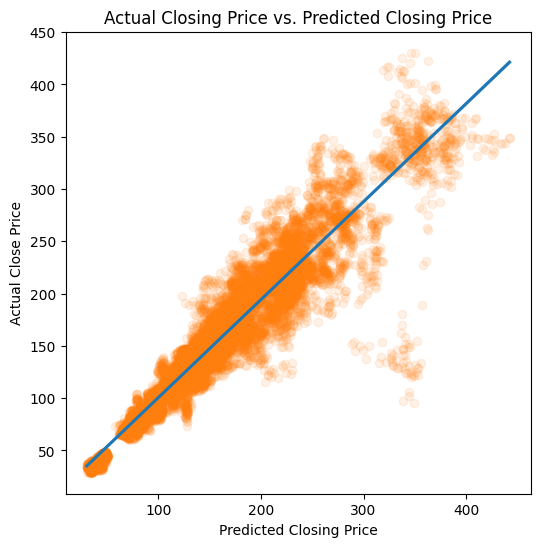

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6), dpi=100)

ax = sns.regplot(
    data=df_test,
    x='Prediction',
    y='Adj Close in 60 Days',
    scatter_kws={'alpha': 0.10, 'color': sns.color_palette()[1]},
    line_kws={'color': sns.color_palette()[0]},
)

plt.title('Actual Closing Price vs. Predicted Closing Price')
plt.xlabel('Predicted Closing Price')
plt.ylabel('Actual Close Price')

plt.show()

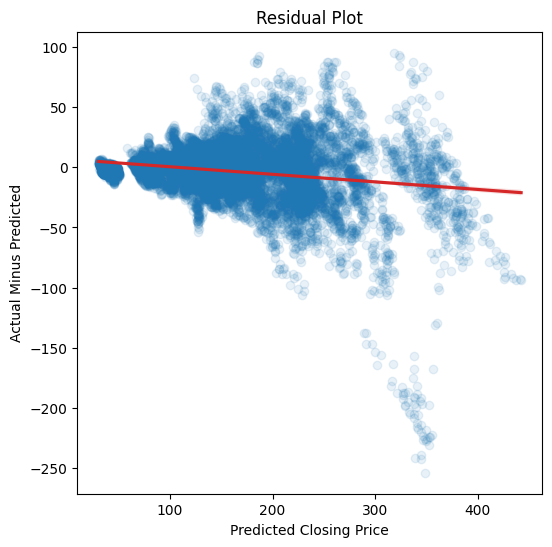

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6), dpi=100)

ax = sns.regplot(
    data=df_test.assign(f=(df_test['Adj Close in 60 Days'] - df_test['Prediction'])),
    x='Prediction',
    y='f',
    scatter_kws={'alpha': 0.10, 'color': sns.color_palette()[0]},
    line_kws={'color': sns.color_palette()[3]},
)

plt.title('Residual Plot')
plt.xlabel('Predicted Closing Price')
plt.ylabel('Actual Minus Predicted')

plt.show()

In [23]:
(df_test['Prediction'] > df_test['Adj Close']).mean()

1.0

In [24]:
(df_test['Adj Close in 60 Days'] > df_test['Adj Close']).mean()

0.6192280783582089

In [25]:
df_test.loc[df_test['Prediction'] > df_test['Adj Close'], ['Adj Close', 'Adj Close in 60 Days']].diff(axis=1)['Adj Close in 60 Days'].sum()

55966.433000564575

In [26]:
df_test.loc[df_test['Prediction'] < df_test['Adj Close'], ['Adj Close', 'Adj Close in 60 Days']].diff(axis=1)['Adj Close in 60 Days'].sum()

0.0

In [27]:
(df_test['Adj Close in 60 Days'] - df_test['Adj Close']).describe()

,0
count,17152.000000
mean,3.262968
std,22.064209
min,-240.543556
25%,-4.017086
50%,3.005753
75%,11.673393
max,110.637756


In [28]:
(df_test['Prediction'] - df_test['Adj Close']).describe()

,0
count,17152.000000
mean,5.811270
std,3.791157
min,2.018541
25%,2.930914
50%,4.867754
75%,7.200345
max,28.344775


In [29]:
try:
    import shap
except ModuleNotFoundError:
    !pip install shap
    import shap

In [30]:
explainer = shap.Explainer(mod, feature_names=X_train.columns, seed=22)

shap_values = explainer(X_test)

shap_values.shape

(17152, 28)

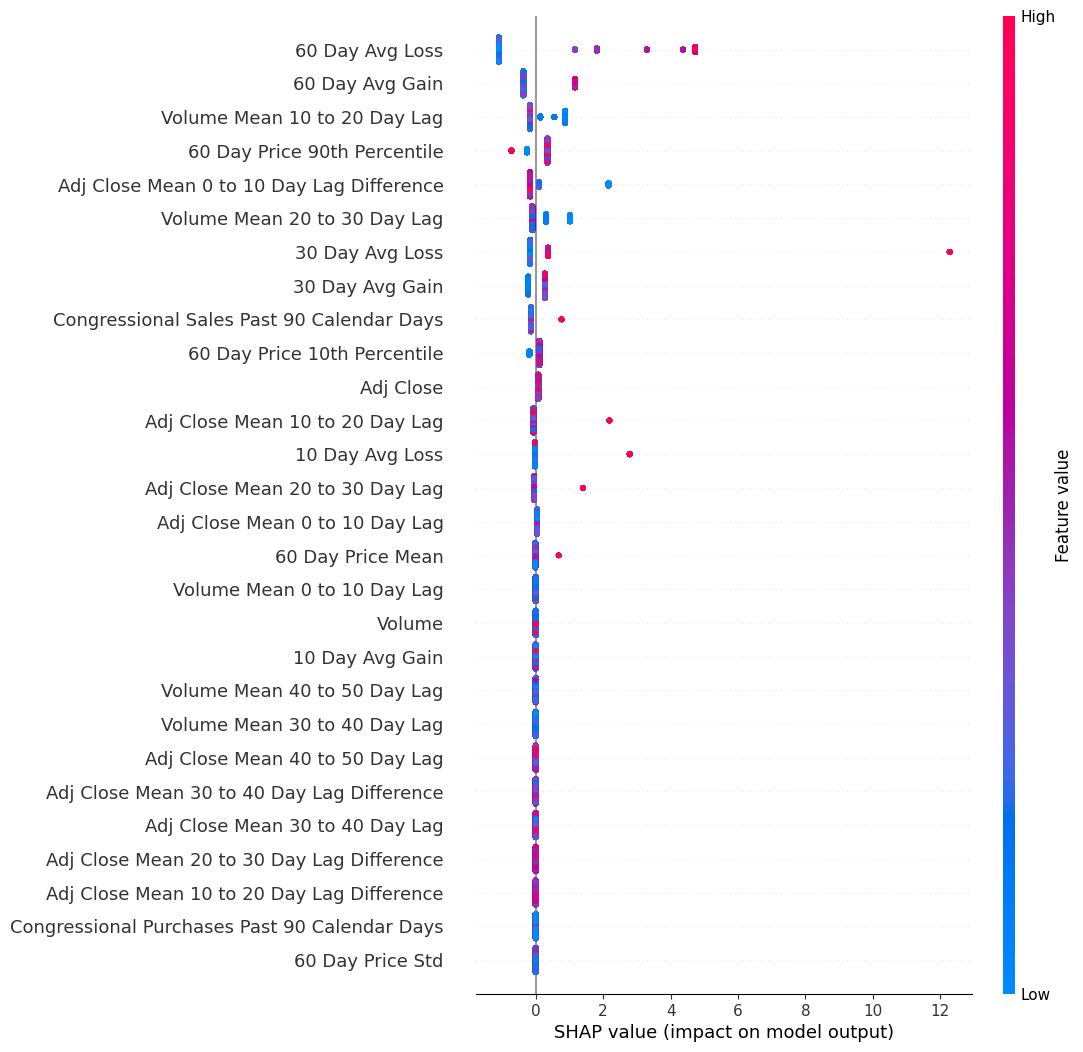

In [31]:
shap.plots.beeswarm(shap_values, max_display=None)